In [1]:
Datos1<-read.csv("../input/atitanic.csv") #traemos el dataframe
head(Datos1,10) #primeros 10 registros
str(Datos1) #estructura de los datos

,PassengerId,Name,Age,Pclass,Sex,Family,Embarked,Survived
,<int>,<fct>,<dbl>,<int>,<fct>,<int>,<fct>,<fct>
1,631,"Barkworth, Mr. Algernon Henry Wilson",80.0,1,male,0,S,vive
2,852,"Svensson, Mr. Johan",74.0,3,male,0,S,muere
3,97,"Goldschmidt, Mr. George B",71.0,1,male,0,C,muere
4,494,"Artagaveytia, Mr. Ramon",71.0,1,male,0,C,muere
5,117,"Connors, Mr. Patrick",70.5,3,male,0,Q,muere
6,673,"Mitchell, Mr. Henry Michael",70.0,2,male,0,S,muere
7,746,"Crosby, Capt. Edward Gifford",70.0,1,male,2,S,muere
8,34,"Wheadon, Mr. Edward H",66.0,2,male,0,S,muere
9,457,"Millet, Mr. Francis Davis",65.0,1,male,0,S,muere


'data.frame':	714 obs. of  8 variables:
 $ PassengerId: int  631 852 97 494 117 673 746 34 457 281 ...
 $ Name       : Factor w/ 714 levels "Abbing, Mr. Anthony",..: 67 642 268 40 168 463 177 695 457 217 ...
 $ Age        : num  80 74 71 71 70.5 70 70 66 65 65 ...
 $ Pclass     : int  1 3 1 1 3 2 1 2 1 3 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 2 2 2 2 2 2 2 2 2 ...
 $ Family     : int  0 0 0 0 0 0 2 0 0 0 ...
 $ Embarked   : Factor w/ 4 levels "C","Q","s","S": 4 4 1 1 2 4 4 4 4 2 ...
 $ Survived   : Factor w/ 2 levels "muere","vive": 2 1 1 1 1 1 1 1 1 1 ...


In [2]:
Datos1$Pclass=as.factor(Datos1$Pclass) #Trasnformar clase en factor
Datos1$PassengerId<-NULL #eliminar Id
Datos1$Name<-NULL #eliminar nombre
str(Datos1) #estructura de los datos

'data.frame':	714 obs. of  6 variables:
 $ Age     : num  80 74 71 71 70.5 70 70 66 65 65 ...
 $ Pclass  : Factor w/ 3 levels "1","2","3": 1 3 1 1 3 2 1 2 1 3 ...
 $ Sex     : Factor w/ 2 levels "female","male": 2 2 2 2 2 2 2 2 2 2 ...
 $ Family  : int  0 0 0 0 0 0 2 0 0 0 ...
 $ Embarked: Factor w/ 4 levels "C","Q","s","S": 4 4 1 1 2 4 4 4 4 2 ...
 $ Survived: Factor w/ 2 levels "muere","vive": 2 1 1 1 1 1 1 1 1 1 ...


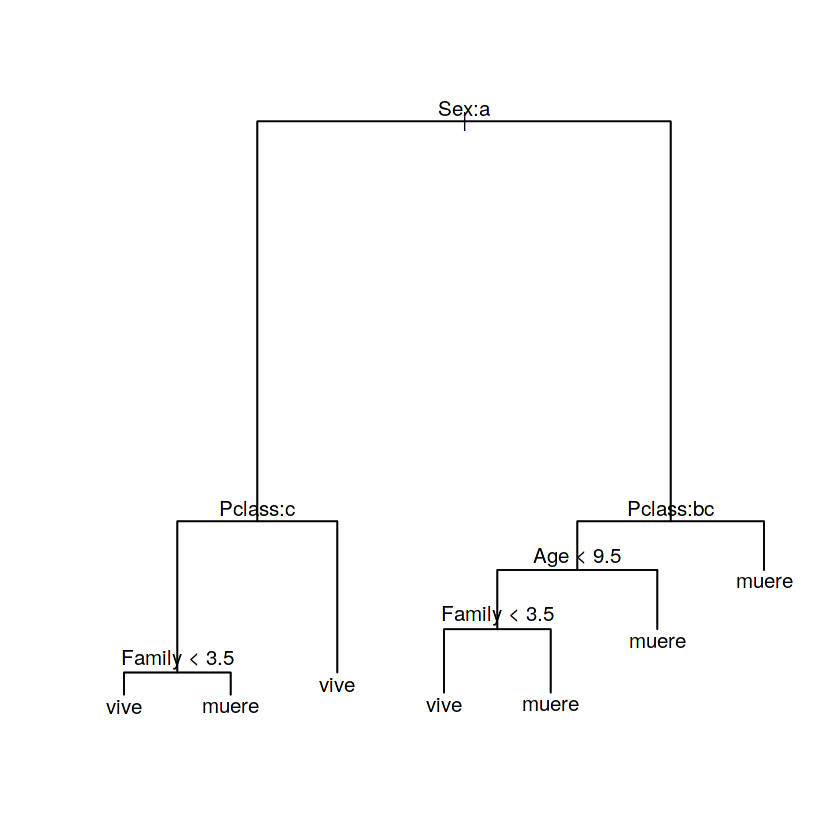

In [3]:
#este es el método que menos me gusta
library(tree)
modelo_tree <- tree(Survived~., data=Datos1)
plot(modelo_tree)
text(modelo_tree)

In [4]:
library(rpart)
library(rpart.plot)

#modelo rpart
modelo_rpart<-rpart(Survived~.,
                    method = "class",
                    data=Datos1)

#importancia del modelo
library(caret) # libreria de la importancia
dt_importance <- varImp(modelo_rpart)
print(dt_importance) #variables y su importancia en el modelo

summary(modelo_rpart) #características del modelo

Loading required package: lattice

Loading required package: ggplot2


Attaching package: ‘caret’


The following object is masked from ‘package:httr’:

    progress




          Overall
Age      25.97947
Embarked 22.93498
Family   40.78796
Pclass   81.46567
Sex      99.99817
Call:
rpart(formula = Survived ~ ., data = Datos1, method = "class")
  n= 714 

          CP nsplit rel error    xerror       xstd
1 0.45862069      0 1.0000000 1.0000000 0.04525169
2 0.02758621      1 0.5413793 0.5413793 0.03816193
3 0.02413793      3 0.4862069 0.5275862 0.03780768
4 0.01000000      5 0.4379310 0.4793103 0.03648331

Variable importance
     Sex   Pclass   Family      Age Embarked 
      56       18       13       10        3 

Node number 1: 714 observations,    complexity param=0.4586207
  predicted class=muere  expected loss=0.4061625  P(node) =1
    class counts:   424   290
   probabilities: 0.594 0.406 
  left son=2 (453 obs) right son=3 (261 obs)
  Primary splits:
      Sex      splits as  RL,       improve=99.998170, (0 missing)
      Pclass   splits as  RRL,      improve=39.252560, (0 missing)
      Embarked splits as  RLRL,     improve=13.941390, (0 mis

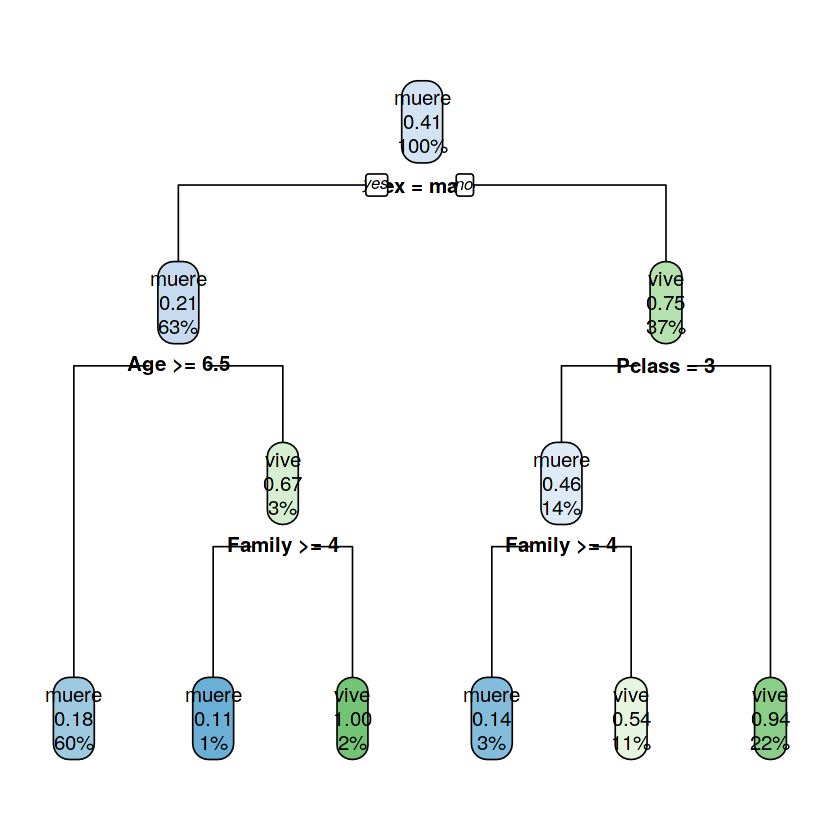

In [5]:
rpart.plot(modelo_rpart)


Call:
C5.0.default(x = Datos1[, c(1:5)], y = Datos1$Survived)


C5.0 [Release 2.07 GPL Edition]  	Sun Jun  7 02:16:26 2020
-------------------------------

Class specified by attribute `outcome'

Read 714 cases (6 attributes) from undefined.data

Decision tree:

Sex = female:
:...Pclass in {1,2}: vive (159/9)
:   Pclass = 3:
:   :...Family <= 3: vive (81/37)
:       Family > 3: muere (21/3)
Sex = male:
:...Age > 13: muere (416/72)
    Age <= 13:
    :...Family <= 3: vive (21/1)
        Family > 3: muere (16/1)


Evaluation on training data (714 cases):

	    Decision Tree   
	  ----------------  
	  Size      Errors  

	     6  123(17.2%)   <<


	   (a)   (b)    <-classified as
	  ----  ----
	   377    47    (a): class muere
	    76   214    (b): class vive


	Attribute usage:

	100.00%	Sex
	 63.45%	Age
	 36.55%	Pclass
	 19.47%	Family


Time: 0.0 secs


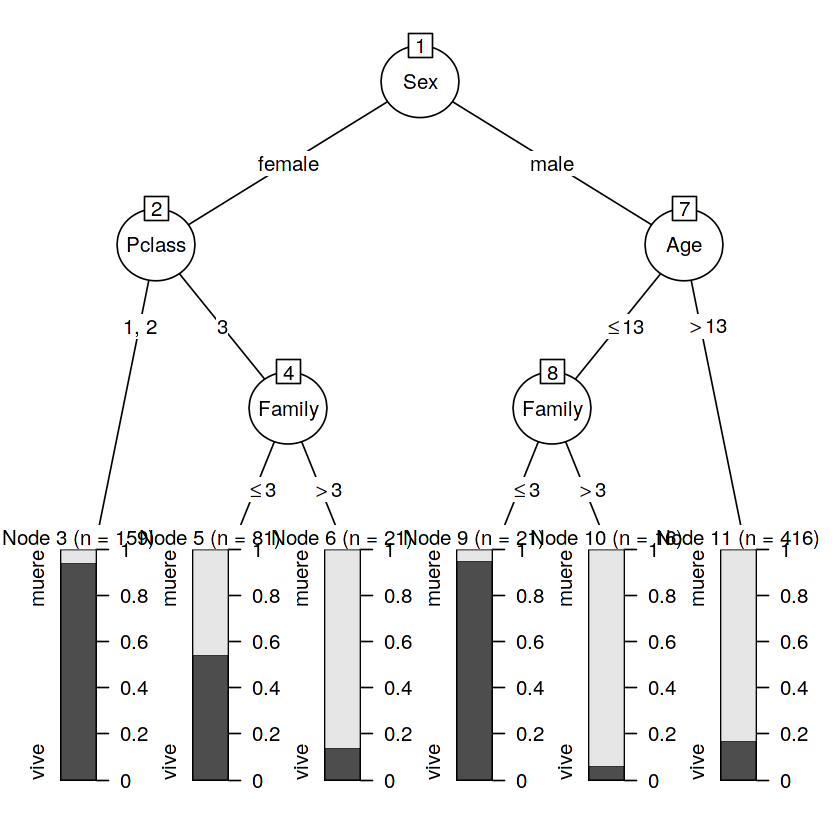

In [6]:
#modelo C50
library(C50)
modelo_c50<-C5.0(Datos1[,c(1:5)],Datos1$Survived)
plot(modelo_c50)
summary(modelo_c50)

Loading required package: grid

Loading required package: mvtnorm

Loading required package: modeltools

Loading required package: stats4

Loading required package: strucchange

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: sandwich



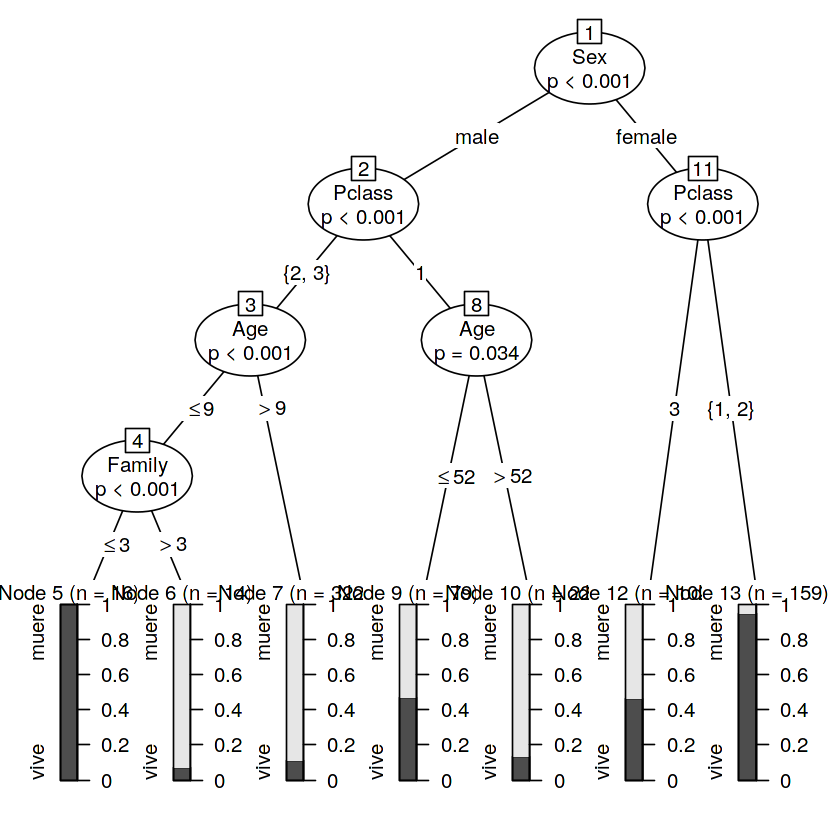

In [7]:
library(party)
modelo_party<-ctree(Survived~.,Datos1)
plot(modelo_party)

In [10]:
dt_importance <- varImp(modelo_c50)
#dt_importance1 <- varImp(modelo_party)
dt_importance2 <- varImp(modelo_rpart)
#dt_importance3 <- varImp(modelo_tree)